# Exercicio - Lorenz Attractor
> Gil Miranda<br>
> Repo: https://github.com/mirandagil/university-courses/tree/master/comp-cientifica-II-2019-2<br>
> GitHub: @mirandagil
   
`last update: 29/08/2019`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [30]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 29/08/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ys[-1], p[0], p[1], p[2])*h
        ys = np.vstack((ys, ynext))
        t = tnext
    return np.array(ys).T

#### A equação do Atrator de Lorenz
$$
\begin{cases}
    \frac{\mathrm{d}x}{\mathrm{d}t} = \sigma(y-x)\\
    \frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho - \ ) -y\\
    \frac{\mathrm{d}z}{\mathrm{d}t} = xy - \beta y
\end{cases}
$$

In [31]:
def lorenz(u, s, p, b):
    x = u[0]
    y = u[1]
    z = u[2]
    return np.array([s*(y-x),x*(p-z)-y,x*y-b*z])

---
Para resolver a EDO com um metódo númerico, digamos Forward Euler, precisamos resolver cada equação do sistema com o metódo, então:

$$
u = \begin{bmatrix}x \\ y \\ z\end{bmatrix}
$$
Então, fazendo Euler no vetor $u$
$$
u_{n+1} = u_n + hf(t_n, u_n)
$$
Que é:
$$
x_{n+1} = x_n + hf(t_n, x_n)\\
y_{n+1} = y_n + hf(t_n, y_n)\\
z_{n+1} = z_n + hf(t_n, z_n)
$$


#### Definindo as condições iniciais e constantes

In [42]:
ts = np.arange(0,30,0.005)
u_01 = [1,0,0]
u_02 = [1,0.1,0.1]
s = 10
p = 27
b = 8/3

#### Aplicando o metódo de Euler e retornando as soluções em forma de vetor (Matrix $nx1$ transposta)

In [43]:
sol_1 = f_euler(lorenz, u_01, ts, [s, p, b])
xs_1 = sol_1[0]
ys_1 = sol_1[1]
zs_1 = sol_1[2]

In [44]:
sol_2 = f_euler(lorenz, u_02, ts, [s, p, b])
xs_2 = sol_1[0]
ys_2 = sol_1[1]
zs_2 = sol_1[2]

#### Plot das soluções em função do tempo $(t)$ condição inicial 1

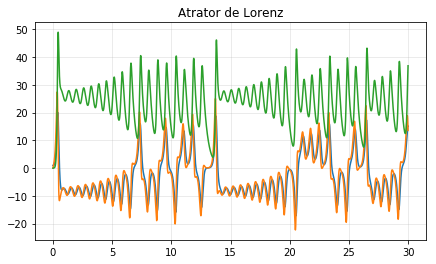

In [46]:
%matplotlib inline
plt.figure(figsize=(7,4))
plt.plot(ts, xs_1)
plt.plot(ts, ys_1)
plt.plot(ts, zs_1)
plt.grid(alpha=0.3)
plt.title('Atrator de Lorenz')
plt.show()

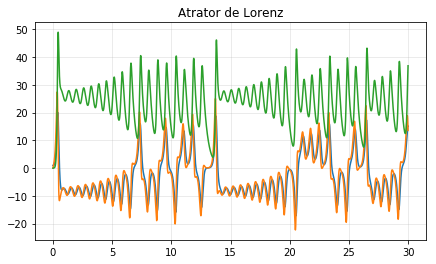

In [47]:
%matplotlib inline
plt.figure(figsize=(7,4))
plt.plot(ts, xs_2)
plt.plot(ts, ys_2)
plt.plot(ts, zs_2)
plt.grid(alpha=0.3)
plt.title('Atrator de Lorenz')
plt.show()

#### Plot das soluções parametrizadas

<IPython.core.display.Javascript object>


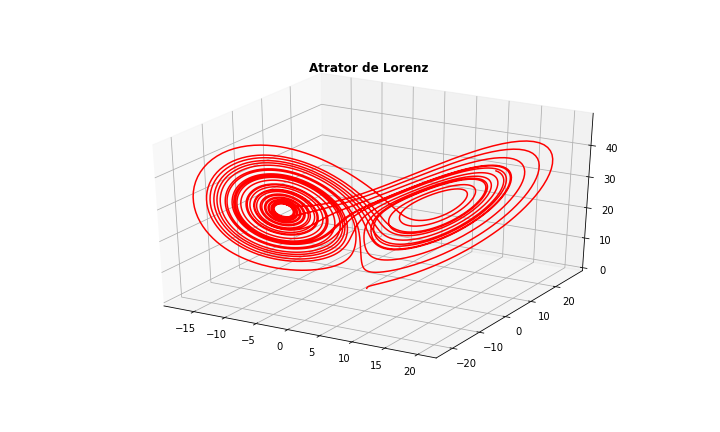

In [50]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
plt.title('Atrator de Lorenz')
ax = plt.axes(projection='3d')
ax.plot3D(xs_1, ys_1, zs_1, color='red')
plt.title('Atrator de Lorenz', fontweight = 'bold')
plt.show()

<IPython.core.display.Javascript object>


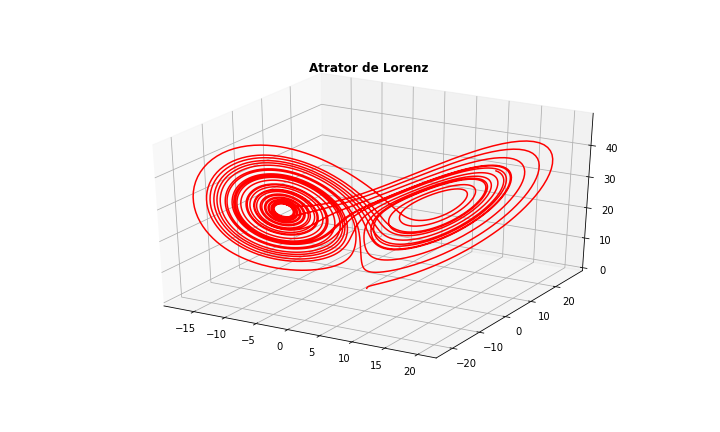

In [51]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
plt.title('Atrator de Lorenz')
ax = plt.axes(projection='3d')
ax.plot3D(xs_2, ys_2, zs_2, color='red')
plt.title('Atrator de Lorenz', fontweight = 'bold')
plt.show()

#### Animação

<IPython.core.display.Javascript object>


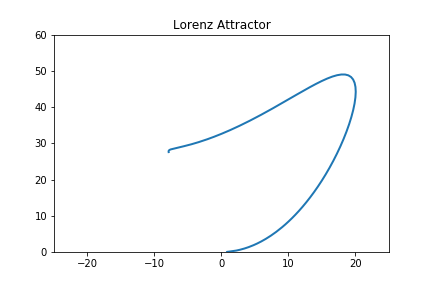

In [36]:
%matplotlib notebook
fig = plt.figure() 
ax = plt.axes(xlim=(-25, 25), ylim=(0, 60)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# x, y values to be plotted 
	x = xs[i] 
	y = zs[i] 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 
	
# setting a title for the plot 
plt.title('Lorenz Attractor') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=6000, interval=20, blit=True) 